<a href="https://colab.research.google.com/github/jdlg-42/TFG/blob/main/distancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install igraph
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.0 MB/s eta 0:00:00


# Código para generar grafos de PSN

In [2]:
# Diccionarios de posición
  # Esta función genera un diccionario que almacena la equivalencia entre la
  # posición real del amino ácido y la posición recogida en la estructura en
  # formato .pdb

from Bio.PDB import PDBParser
from Bio.Data.IUPACData import protein_letters_3to1

# Función auxiliar para convertir 3 letras a 1, con nombres capitalizados
def convertir_nombre_residuo(resname):
    tres_a_una = {
        'ALA': 'Ala', 'ARG': 'Arg', 'ASN': 'Asn', 'ASP': 'Asp',
        'CYS': 'Cys', 'GLN': 'Gln', 'GLU': 'Glu', 'GLY': 'Gly',
        'HIS': 'His', 'ILE': 'Ile', 'LEU': 'Leu', 'LYS': 'Lys',
        'MET': 'Met', 'PHE': 'Phe', 'PRO': 'Pro', 'SER': 'Ser',
        'THR': 'Thr', 'TRP': 'Trp', 'TYR': 'Tyr', 'VAL': 'Val'
    }
    return tres_a_una.get(resname.upper(), resname.capitalize())

def crear_diccionario_residuos(pdb_file, cadena_id="A"):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("estructura", pdb_file)
    modelo = estructura[0]
    cadena = modelo[cadena_id]

    resnum_to_respos = {}
    for residuo in cadena:
        if residuo.id[0] != " ":  # Excluye HETATM y aguas
            continue
        resname = convertir_nombre_residuo(residuo.resname)
        resnum = residuo.id[1]  # auth position
        resnum_to_respos[resnum] = f"{resname}{resnum}"

    return resnum_to_respos

In [4]:
from Bio.PDB import PDBParser, PDBIO, Select
import numpy as np

# Cargar la estructura
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", "pdb3sn6.pdb")

# Definir clase que excluye los residuos elegidos
cadena_objetivo = "R"  # Solo eliminar residuos de esta cadena
residuos_excluir = np.arange(867, 1131)

# 3. Crear clase de selección
class ResidueSelect(Select):
    def accept_residue(self, residue):
        # Solo eliminar residuos en la cadena específica
        chain_id = residue.get_parent().id
        resnum = residue.get_id()[1]  # Segundo elemento del ID
        if chain_id == cadena_objetivo and resnum in residuos_excluir:
            return 0  # Excluir
        return 1      # Incluir

# Guardar la nueva estructura
io = PDBIO()
io.set_structure(structure)
io.save("pdb3sn6_filt.pdb", ResidueSelect())

In [5]:
# Diccionario de sitios importantes

sites = {
    "A2A_adenosine": [168, 169, 253, 277, 278],
    "A2A_G": [102, 110, 227, 231, 235],
    "beta2AR_epi_4ldo": [1113, 1114, 1193, 1203],
    "beta2AR_epi_3sn6": [113, 114, 193, 203],
    "beta2AR_G_4ldo":[1127, 1135, 1271, 1278],
    "beta2AR_G_3sn6":[134, 135, 138, 139, 229]
    }

Para receptor A2A de adenosina:

* 2YDO: cadena A, sites["A2A_adenosine"], sites["A2A_G"]
* 5G53: cadena A, sites["A2A_adenosine"], sites["A2A_G"]

Para receptor beta-2 adrenérgico:
* 4LDO: cadena A, sites["beta2AR_epi4ldo"], sites["beta2AR_G_4ldo"]
* 3SN6: cadena R, sites["beta2AR_epi3sn6"], sites["beta2AR_G_3sn6"]

In [7]:
# Configuración de secuencia y sitios alostérico y ortostérico
  # modificar para analizar el grafo para cada ID específico de interés

pdb_id = "2ydo".lower()
chain_id = "A"
sitio_A = sites["A2A_adenosine"] # sitio de unión del ligando alostérico
sitio_O = sites["A2A_G"] # sitio de unión de la proteína G

# Generar diccionario de residuos con la nomenclatura de tres letras

pdb_path = f"pdb{pdb_id}_filt.pdb"
print(pdb_path)

pdb2ydo_filt.pdb


Desde aqui
[('R', 30, ''), ('R', 31, ''), ('R', 32, ''), ('R', 33, ''), ('R', 34, ''), ('R', 35, ''), ('R', 36, ''), ('R', 37, ''), ('R', 38, ''), ('R', 39, ''), ('R', 40, ''), ('R', 41, ''), ('R', 42, ''), ('R', 43, ''), ('R', 44, ''), ('R', 45, ''), ('R', 46, ''), ('R', 47, ''), ('R', 48, ''), ('R', 49, ''), ('R', 50, ''), ('R', 51, ''), ('R', 52, ''), ('R', 53, ''), ('R', 54, ''), ('R', 55, ''), ('R', 56, ''), ('R', 57, ''), ('R', 58, ''), ('R', 59, ''), ('R', 60, ''), ('R', 61, ''), ('R', 62, ''), ('R', 63, ''), ('R', 64, ''), ('R', 65, ''), ('R', 66, ''), ('R', 67, ''), ('R', 68, ''), ('R', 69, ''), ('R', 70, ''), ('R', 71, ''), ('R', 72, ''), ('R', 73, ''), ('R', 74, ''), ('R', 75, ''), ('R', 76, ''), ('R', 77, ''), ('R', 78, ''), ('R', 79, ''), ('R', 80, ''), ('R', 81, ''), ('R', 82, ''), ('R', 83, ''), ('R', 84, ''), ('R', 85, ''), ('R', 86, ''), ('R', 87, ''), ('R', 88, ''), ('R', 89, ''), ('R', 90, ''), ('R', 91, ''), ('R', 92, ''), ('R', 93, ''), ('R', 94, ''), ('R', 95, '')

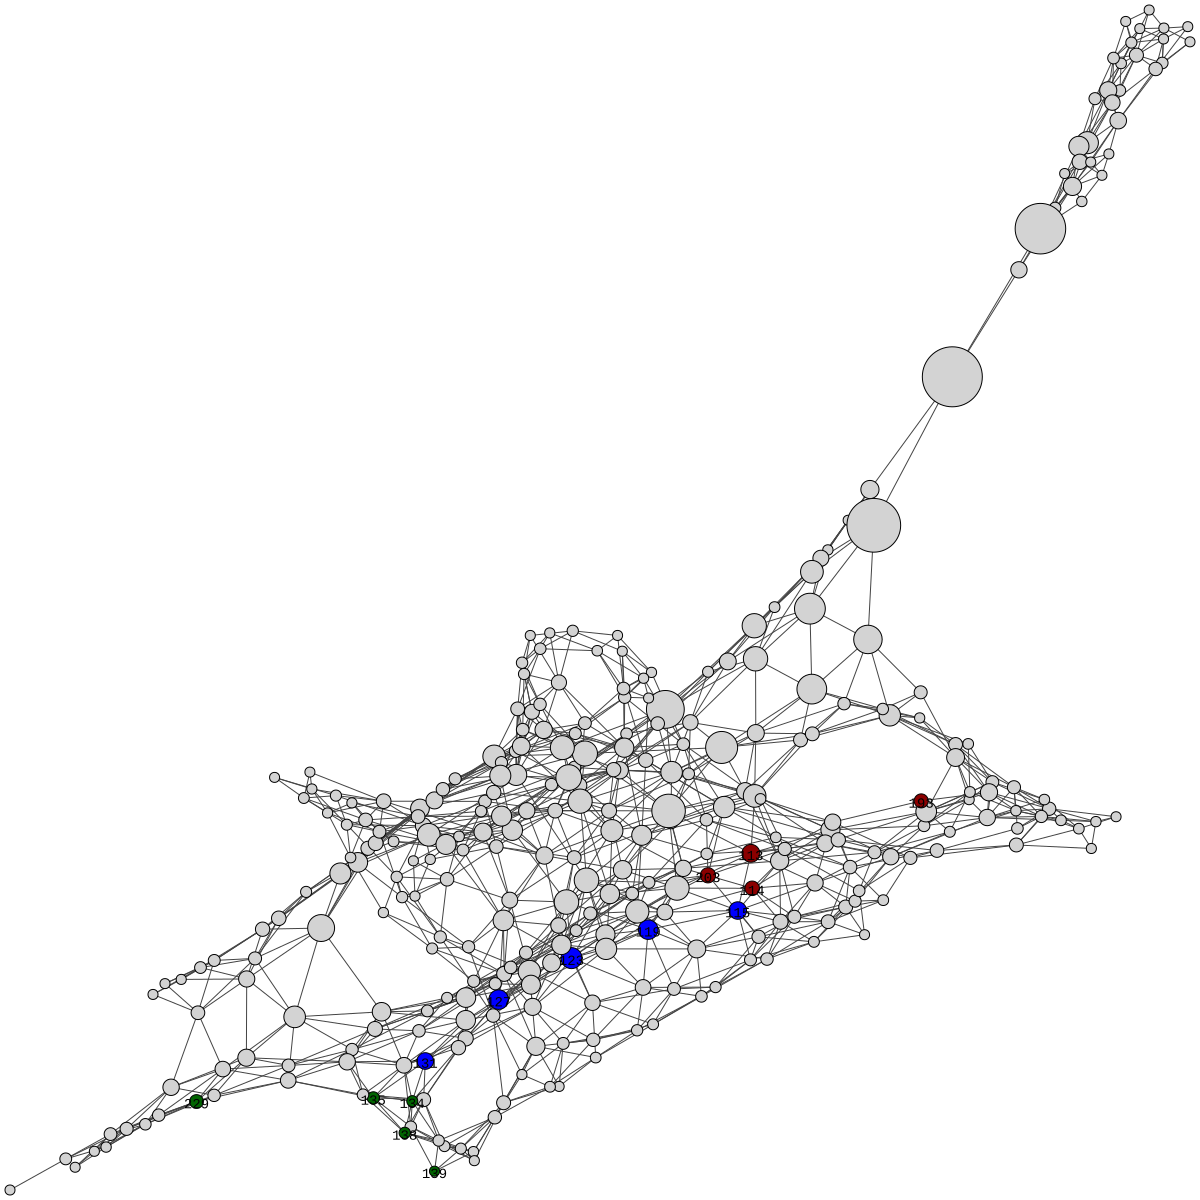

In [ ]:
## Grafo de contacto de proteínas ##

# == Comandos de preparación ==

from Bio.PDB import PDBParser
from scipy.spatial import cKDTree
import numpy as np
import random
import igraph as ig
import matplotlib.pyplot as plt
from IPython.display import display, HTML

np.random.seed(42)
random.seed(42)

# Configuración de secuencia y

parser = PDBParser(QUIET=True)
structure = parser.get_structure(f"{pdb_id}", f"pdb{pdb_id}_filt.pdb")

# === Extracción de los CA ===
CA_coord = []
CA_info = []  # lista de tuplas: [(chain_id, resnum, icode), ...]

for model in structure:
    for chain in model:
        if chain.id == chain_id:
            for residue in chain:
                if "CA" in residue:
                    coord = residue["CA"].get_coord()
                    resid = (chain.id, residue.id[1], residue.id[2].strip())  # ('A', 234, '')
                    CA_coord.append(coord)
                    CA_info.append(resid)

node_to_resid = {idx: resid for idx, resid in enumerate(CA_info)}
resid_to_node = {resid: idx for idx, resid in enumerate(CA_info)}


# === Árbol de búsqueda y pares ===
tree = cKDTree(CA_coord)
atom_pairs = tree.query_pairs(r=10)

r_min = 4
r_max = 8
atom_pairsfilt = set()
for i, j in atom_pairs:
    dist = np.linalg.norm(CA_coord[i] - CA_coord[j])
    if r_min <= dist <= r_max:
        atom_pairsfilt.add((i, j))

# === Grafo ===

g = ig.Graph()
g.add_vertices(len(CA_coord))
g.add_edges(atom_pairsfilt)

# === Cálculo de caminos más cortos ===

shortest_paths = []
colors = ["gold", "blue", "green", "purple", "orange", "cyan"]  # Lista de colores que se asignarán a los caminos

for a_resid in sitio_A:
    for o_resid in sitio_O:
        key_a = (chain_id, a_resid, "")
        key_o = (chain_id, o_resid, "")
        if key_a in resid_to_node and key_o in resid_to_node:
            a = resid_to_node[key_a]
            o = resid_to_node[key_o]
            try:
                path = g.get_shortest_paths(a, to=o)[0]
                if path:
                    shortest_paths.append({
                        "path": path,
                        "length": len(path),
                        "color": colors[len(shortest_paths) % len(colors)],
                        "nodes": (a_resid, o_resid),
                    })
            except:
                continue

# Calculamos el betweenness de los nodos

g.vs["betweenness"] = g.betweenness()
max_btw = max(g.vs["betweenness"])
min_btw = min(g.vs["betweenness"])

# === Añadir la métrica de centralidad a cada camino más corto ===
for path_info in shortest_paths:
    path = path_info["path"]
    centralities = [g.vs[node]["betweenness"] for node in path]
    path_info["centrality_score"] = np.mean(centralities) # se calcula la media

# === Ordenar los caminos más cortos por suma de betweenness ===
shortest_paths.sort(key=lambda x: x["centrality_score"], reverse=True)

# Escalar tamaños entre 10 y 40
g.vs["size"] = [
    10 + 50 * ((btw - min_btw) / (max_btw - min_btw + 1e-9))
    for btw in g.vs["betweenness"]
]

g.vs["color"] = ["lightgray"]
g.vs["label"] = [None] * len(g.vs)

# === Asignación de colores a los caminos más cortos ===
print("="*50)
print(f"Caminos más cortos ordenados por la medida de centralidad media:")
print("="*50)
for idx, path_info in enumerate(shortest_paths):
    color = path_info["color"]
    path = path_info["path"]
    resid_path = [node_to_resid[n][1] for n in path]  # extrae resnum

    # Imprimir la información de cada shortest path
    print(f"Caminos más cortos entre los nodos {path_info['nodes']} (color: {color}):")
    print(f"Índice: {idx+1}")
    print(f"  Nodos involucrados: {path_info['path']}")
    print(f"  Residuos involucrados (posición): {resid_path}")
    print(f"  Centralidad promedio: {path_info['centrality_score']:.2f}")
    print(f"  Color asignado: {path_info['color']}")
    print("-"*50)

# === Preguntar al usuario qué camino desea visualizar ===
try:
    selection = int(input("Introduce el número del camino más corto que deseas visualizar (0 para ninguno): "))
    if 1 <= selection <= len(shortest_paths):
        chosen_path = shortest_paths[selection - 1]
        for node in chosen_path["path"]:
            g.vs[node]["color"] = chosen_path["color"]
            resid = node_to_resid[node][1]
            label = resid
            g.vs[node]["label"] = label
    else:
        print("Número fuera de rango. No se coloreará ningún camino.")
except ValueError:
    print("Entrada no válida. No se coloreará ningún camino.")

# === Sitios de interés ===
for resid in sitio_A:
    key = (chain_id, resid, "")
    if key in resid_to_node:
        node_idx = resid_to_node[key]
        g.vs[node_idx]["color"] = "darkred"
        label = resid
        g.vs[node_idx]["label"] = label

for resid in sitio_O:
    key = (chain_id, resid, "")
    if key in resid_to_node:
        node_idx = resid_to_node[key]
        g.vs[node_idx]["color"] = "darkgreen"
        label = resid
        g.vs[node_idx]["label"] = label

# === Plot ===
layout = g.layout_fruchterman_reingold()
ig.plot(g, layout=layout, bbox=(1200, 1200), margin=10)

Introduce el residuo en formato (cadena, número de residuo, código de inserción) (ejemplo: 'A', 234, ''): 'A', 115 ,' '
El residuo ('A', 115, ' ') no se encuentra en el grafo.


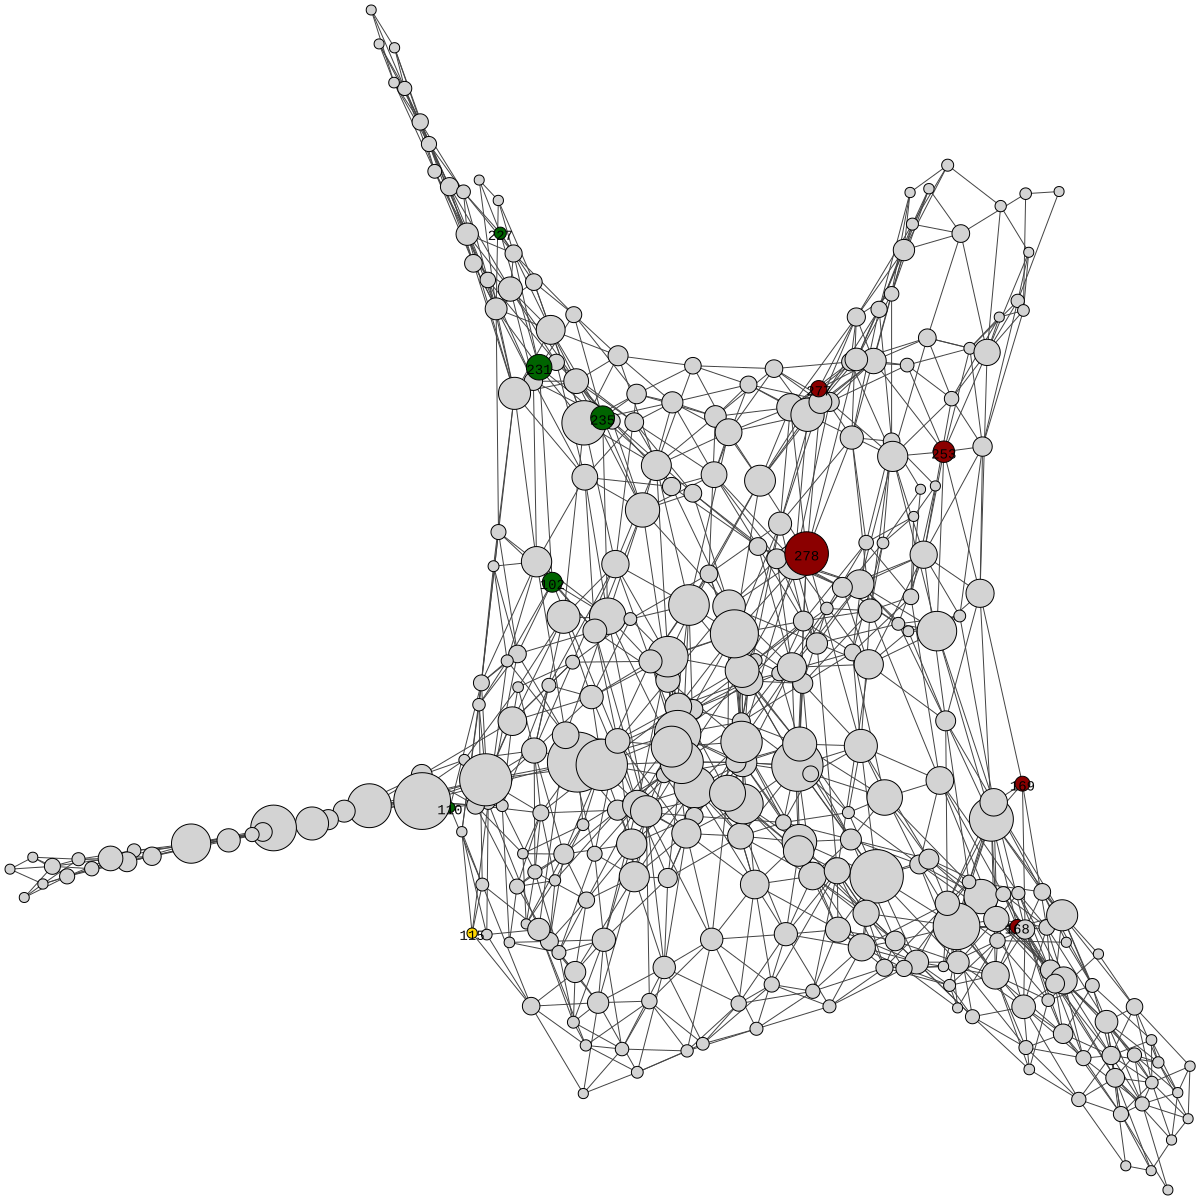

In [14]:
# Creación de grafo de contacto y resaltar los aminoácidos de alta atención

## Grafo de contacto de proteínas ##

# == Comandos de preparación ==

from Bio.PDB import PDBParser
from scipy.spatial import cKDTree
import numpy as np
import random
import igraph as ig
import matplotlib.pyplot as plt
from IPython.display import display, HTML

np.random.seed(42)
random.seed(42)

# Configuración de secuencia y

parser = PDBParser(QUIET=True)
structure = parser.get_structure(f"{pdb_id}", f"pdb{pdb_id}.pdb")

# === Extracción de los CA ===
CA_coord = []
CA_info = []  # lista de tuplas: [(chain_id, resnum, icode), ...]

for model in structure:
    for chain in model:
        if chain.id == chain_id:
            for residue in chain:
                if "CA" in residue:
                    coord = residue["CA"].get_coord()
                    resid = (chain.id, residue.id[1], residue.id[2].strip())  # ('A', 234, '')
                    CA_coord.append(coord)
                    CA_info.append(resid)

node_to_resid = {idx: resid for idx, resid in enumerate(CA_info)}
resid_to_node = {resid: idx for idx, resid in enumerate(CA_info)}


# === Árbol de búsqueda y pares ===
tree = cKDTree(CA_coord)
atom_pairs = tree.query_pairs(r=10)

r_min = 4
r_max = 8
atom_pairsfilt = set()
for i, j in atom_pairs:
    dist = np.linalg.norm(CA_coord[i] - CA_coord[j])
    if r_min <= dist <= r_max:
        atom_pairsfilt.add((i, j))

# === Grafo ===

g = ig.Graph()
g.add_vertices(len(CA_coord))
g.add_edges(atom_pairsfilt)

# === Cálculo de caminos más cortos ===

shortest_paths = []
colors = ["gold", "blue", "green", "purple", "orange", "cyan"]  # Lista de colores que se asignarán a los caminos

for a_resid in sitio_A:
    for o_resid in sitio_O:
        key_a = (chain_id, a_resid, "")
        key_o = (chain_id, o_resid, "")
        if key_a in resid_to_node and key_o in resid_to_node:
            a = resid_to_node[key_a]
            o = resid_to_node[key_o]
            try:
                path = g.get_shortest_paths(a, to=o)[0]
                if path:
                    shortest_paths.append({
                        "path": path,
                        "length": len(path),
                        "color": colors[len(shortest_paths) % len(colors)],
                        "nodes": (a_resid, o_resid),
                    })
            except:
                continue

# Calculamos el betweenness de los nodos

g.vs["betweenness"] = g.betweenness()
max_btw = max(g.vs["betweenness"])
min_btw = min(g.vs["betweenness"])

# Escalar tamaños
g.vs["size"] = [
    10 + 50 * ((btw - min_btw) / (max_btw - min_btw + 1e-9))
    for btw in g.vs["betweenness"]
]

g.vs["color"] = ["lightgray"]
g.vs["label"] = [None] * len(g.vs)

user_input = input("Introduce el residuo en formato (cadena, número de residuo, código de inserción) (ejemplo: 'A', 234, ''): ")
user_resid = eval(user_input)  # Convertir el input a tupla
chain_id, resnum, icode = user_resid

key = (chain_id, resnum, icode)
if key in resid_to_node:
    node_idx = resid_to_node[key]
    centrality_score = g.vs[node_idx]["betweenness"]
    print(f"Centralidad de intermediación (betweenness) para el residuo {user_resid}: {centrality_score:.2f}")
else:
    print(f"El residuo {user_resid} no se encuentra en el grafo.")

# === Sitios de interés ===
for resid in sitio_A:
    key = (chain_id, resid, "")
    if key in resid_to_node:
        node_idx = resid_to_node[key]
        g.vs[node_idx]["color"] = "darkred"
        label = resid
        g.vs[node_idx]["label"] = label

for resid in sitio_O:
    key = (chain_id, resid, "")
    if key in resid_to_node:
        node_idx = resid_to_node[key]
        g.vs[node_idx]["color"] = "darkgreen"
        label = resid
        g.vs[node_idx]["label"] = label

for resid in user_resid:
    key = (chain_id, resid, "")
    if key in resid_to_node:
        node_idx = resid_to_node[key]
        g.vs[node_idx]["color"] = "gold"
        label = resid
        g.vs[node_idx]["label"] = label

# === Plot ===
layout = g.layout_fruchterman_reingold()
ig.plot(g, layout=layout, bbox=(1200, 1200), margin=10)